## Problem Statement: Personality Test Clustering for Identifying Similar Traits

In this project, a surprise personality test was conducted among a group of students, where they were asked to rate themselves on a scale of 1 to 5 across various personal and behavioral traits. The aim of the project is to analyze the results of the personality test, group students with similar personality traits, and identify patterns or similarities among individuals based on their self-assessments.

The data collected from the test was converted into a CSV format, which includes multiple columns representing different personality traits, and rows corresponding to each student's ratings. The goal is to apply hierarchical clustering techniques to group students with similar personality profiles and explore the potential clusters that arise from this analysis.

By performing this clustering, the project aims to:
1. **Identify clusters of students with similar personality profiles** using their self-assessed ratings.
2. **Visualize the results** using dendrograms and other clustering methods to gain insights into personality similarities.
3. **Provide recommendations** for further psychological or behavioral studies based on the identified clusters, potentially aiding in group formation, project allocation, or further research into student behavior.

This analysis helps us understand the variety of personality traits within the group and find common traits among individuals, providing a data-driven approach to personality grouping.

### Objectives:
- Perform hierarchical clustering on the dataset of student personality ratings.
- Visualize the clusters using dendrograms.
- Group students based on personality similarity and provide insights on the personality traits shared within each cluster.

### Dataset:
- The dataset consists of multiple personality traits (columns) rated on a scale of 1-5.
- Each row corresponds to an individual student's responses.

This project bridges data science and psychology, helping uncover hidden relationships between students' personality traits.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [29]:
data = pd.read_csv('PGA 27 Immarticus GC.csv')
data.head()

,Timestamp,Score,Name,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest.,Seeing other people cry can easily make you feel like you want to cry too.,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure.","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know.",You prefer to completely finish one project before starting another.,...,"When someone thinks highly of you, you wonder how long it will take them to feel disappointed in you.",You would love a job that requires you to work alone most of the time.,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.
0,10/16/2024 11:04:33,0 / 180,Shubh Bhinde,3,5,3,2,5,3,4,...,1,1,2,3,4,2,2,1,5,2
1,10/16/2024 11:05:42,0 / 180,Anurag Phatak,3,5,1,3,5,5,5,...,2,2,1,1,2,2,5,3,5,1
2,10/16/2024 11:06:58,0 / 180,Tanvi Ramchandra Barbade,5,4,5,5,3,3,5,...,1,2,1,3,5,5,3,2,2,1
3,10/16/2024 11:07:59,0 / 180,Sangeeta Barman,3,5,4,4,1,4,5,...,5,5,1,1,3,4,3,5,3,5
4,10/16/2024 11:09:34,0 / 180,Gautami Mhatre,5,5,5,4,3,2,5,...,1,1,3,3,4,4,5,4,4,4


In [30]:
X = df.drop(columns=['Timestamp', 'Score', 'Name']).values 

In [31]:
# Step 1: Reduce dimensions to 3D using t-SNE
tsne = TSNE(n_components=3, perplexity=5, random_state=42)  # Adjust perplexity as needed
X_reduced = tsne.fit_transform(X)

C:\Users\rahil\miniconda3\envs\GAN\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rahil\miniconda3\envs\GAN\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [39]:
X_reduced

array([[-167.33653 ,  -53.495342,  222.98209 ],
       [-258.89508 ,  -73.27936 ,  -16.319233],
       [  21.544292,   14.969561, -316.77142 ],
       [  28.041933,  107.81793 ,  -53.915607],
       [ 142.381   , -616.8109  ,  -66.11749 ],
       [ 292.94525 ,  210.82329 ,   85.990486],
       [-267.41446 , -187.47366 , -390.00787 ],
       [ -84.595436, -284.88483 ,  -85.420784],
       [ -59.774445,  -34.055355, -101.64277 ],
       [  94.78368 ,  144.21051 ,  154.88669 ],
       [ 344.376   ,  -12.799385,  -64.047195],
       [ 145.90715 ,  226.76393 , -181.97374 ],
       [ 192.89629 , -194.91284 ,   47.192158],
       [-156.61415 ,  202.91829 ,   14.910093],
       [-460.58087 ,   64.832085,  146.43698 ],
       [ -15.288329, -376.97244 ,   24.085028],
       [  64.15647 , -100.929146,  157.95633 ],
       [  44.845726, -177.83464 , -166.693   ],
       [ 464.07153 ,  -61.199417, -112.858055],
       [ -74.460266,  -84.35123 ,   41.605732],
       [-155.51137 ,  106.65587 ,  176.4

### Kmeans

In [32]:
# Step 2: Apply KMeans clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

In [33]:
# Add cluster labels to the DataFrame
df['Cluster'] = labels

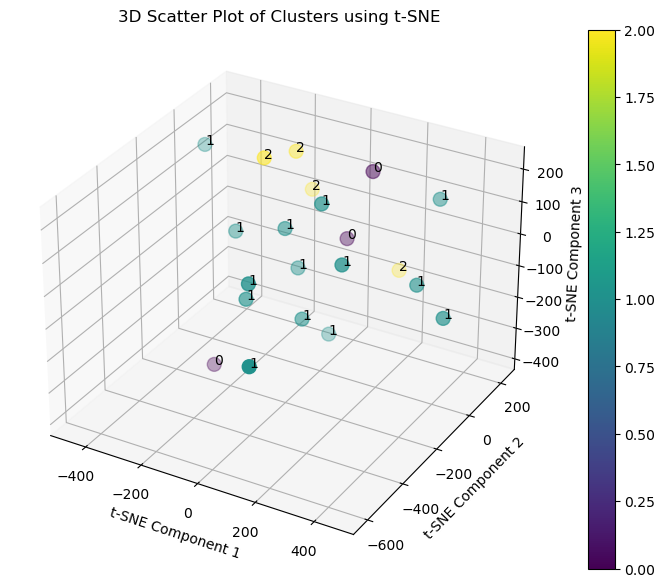

In [37]:
# Add cluster labels to the DataFrame
df['Cluster'] = labels

# Step 3: Plot the clustered data in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on cluster labels
sc = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, cmap='viridis', s=100)
plt.colorbar(sc)  # Show color scale
ax.set_title('3D Scatter Plot of Clusters using t-SNE')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

# Optionally, add annotations for each point (useful for small datasets)
for i in range(len(df)):
    ax.text(X_reduced[i, 0], X_reduced[i, 1], X_reduced[i, 2], str(df['Cluster'][i]), size=10)

plt.show()

In [38]:
# Display the DataFrame with cluster assignments
print(df[['Name', 'Cluster']])  # Show the Name and Cluster columns

                        Name  Cluster
0               Shubh Bhinde        2
1              Anurag Phatak        1
2   Tanvi Ramchandra Barbade        1
3            Sangeeta Barman        0
4             Gautami Mhatre        1
5       Nandini Rajesh gupta        1
6             Aditya Agarwal        0
7      pravin jayram wakale         1
8     Sakshi Sandeep Gaikwad        1
9            jonathan martin        0
10              Piyush salvi        1
11            Bhavesh Golani        2
12            karishma rawal        1
13            Mohammed Rahil        2
14       Amiya Satyabant Kar        1
15     Aaditi Rajesh Chavan         1
16     Anushka Ankush Sakpal        1
17               Faiz Pathan        1
18           vighnesh Prabhu        1
19          Abdul Kadir Meer        1
20                Asad mulla        2


### Scaled the values here

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


- T-SNE (t-distributed Stochastic Neighbor Embedding) is a **dimensionality reduction** technique used to visualize high-dimensional data in 2D or 3D. 

### Why we used it:
- **Dimensionality Reduction**: t-SNE mapped the complex personality data into a lower-dimensional space (3D) while retaining the structure.
- **Visualization**: It helped us see how the data points (students) are distributed and identify clusters visually, making it easier to interpret the results.

In [74]:
X = df.drop(columns=['Timestamp', 'Score', 'Name']).values  # Replace with actual columns as needed

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Reduce dimensions to 3D using t-SNE
tsne = TSNE(n_components=3, perplexity=5, random_state=42)  # Adjust perplexity as needed
X_reduced = tsne.fit_transform(X_scaled)

# Step 3: Apply KMeans clustering
n_clusters = 3  # You can adjust this based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = labels



C:\Users\rahil\miniconda3\envs\GAN\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rahil\miniconda3\envs\GAN\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 0, 't-SNE Component 3')

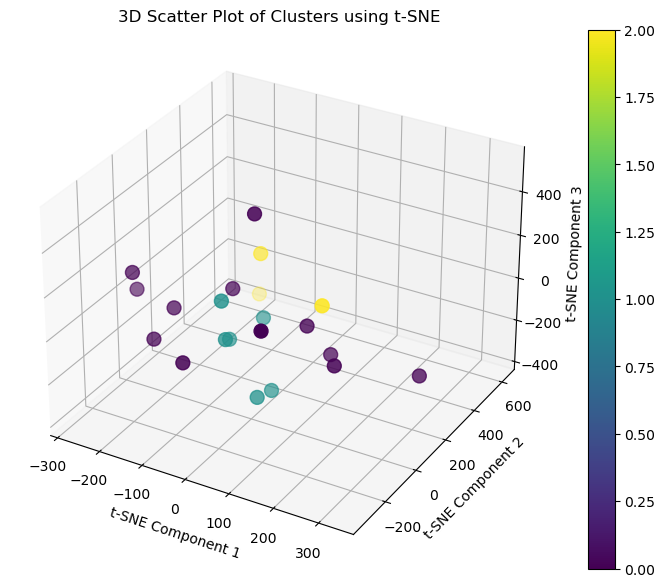

In [75]:
# Step 4: Plot the clustered data in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on cluster labels
sc = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, cmap='viridis', s=100)
plt.colorbar(sc)  # Show color scale
ax.set_title('3D Scatter Plot of Clusters using t-SNE')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')



In [76]:
# Optionally, add annotations for each point (useful for small datasets)
for i in range(len(df)):
    ax.text(X_reduced[i, 0], X_reduced[i, 1], X_reduced[i, 2], str(df['Cluster'][i]), size=10)

plt.show()

# Display the DataFrame with cluster assignments
print(df[['Name', 'Cluster']])  # Show the Name and Cluster columns


                        Name  Cluster
0               Shubh Bhinde        1
1              Anurag Phatak        1
2   Tanvi Ramchandra Barbade        0
3            Sangeeta Barman        0
4             Gautami Mhatre        0
5       Nandini Rajesh gupta        0
6             Aditya Agarwal        2
7      pravin jayram wakale         0
8     Sakshi Sandeep Gaikwad        0
9            jonathan martin        2
10              Piyush salvi        0
11            Bhavesh Golani        1
12            karishma rawal        0
13            Mohammed Rahil        1
14       Amiya Satyabant Kar        0
15     Aaditi Rajesh Chavan         0
16     Anushka Ankush Sakpal        0
17               Faiz Pathan        0
18           vighnesh Prabhu        2
19          Abdul Kadir Meer        1
20                Asad mulla        1


### Elbow point to find no of clusters:

1. **Why Elbow Method?**
   - In clustering, we often don't know how many clusters to create. The **Elbow Method** helps us find the best number by measuring how compact the clusters are (using WCSS).
   - **WCSS (Within-Cluster Sum of Squares)** measures the squared distance between each point and the centroid of its cluster. The goal is to minimize this distance.
   - We plot WCSS against the number of clusters (k). Initially, adding more clusters reduces WCSS significantly, but after a certain point (the "elbow"), the reduction slows down, indicating the optimal number of clusters.

2. **Why we plotted WCSS?**
   - Plotting helps visualize where the drop in WCSS starts leveling off. The **elbow point** is the number of clusters where further increasing clusters adds little value, indicating the most efficient clustering solution.

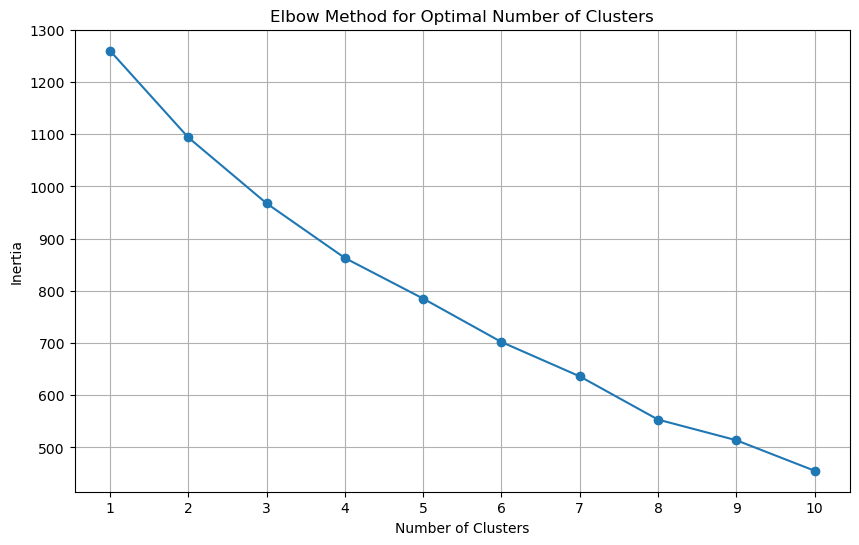

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

X = df.drop(columns=['Timestamp', 'Score', 'Name']).values  # Replace with actual columns as needed

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Determine the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)  # Check for clusters from 1 to 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid()
plt.show()


In [68]:
# Step 3: Apply KMeans clustering with the determined number of clusters
n_clusters = 3  # Replace with the optimal number of clusters from the elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = labels


In [69]:
# Step 4: Reduce dimensions to 3D using t-SNE
tsne = TSNE(n_components=3, perplexity=5, random_state=42)
X_reduced = tsne.fit_transform(X_scaled)


C:\Users\rahil\miniconda3\envs\GAN\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\rahil\miniconda3\envs\GAN\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 0, 't-SNE Component 3')

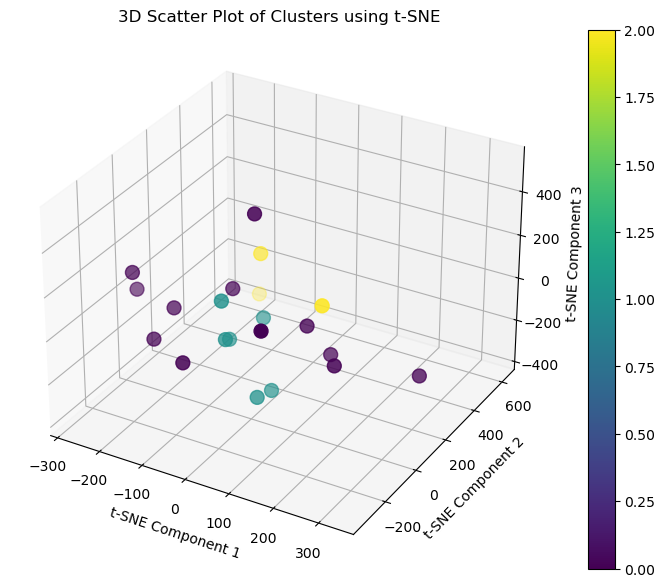

In [71]:
# Step 5: Plot the clustered data in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors based on cluster labels
sc = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, cmap='viridis', s=100)
plt.colorbar(sc)  # Show color scale
ax.set_title('3D Scatter Plot of Clusters using t-SNE')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')




In [72]:
# Optionally, add annotations for each point (useful for small datasets)
for i in range(len(df)):
    ax.text(X_reduced[i, 0], X_reduced[i, 1], X_reduced[i, 2], str(df['Cluster'][i]), size=10)

plt.show()

# Display the DataFrame with cluster assignments
print(df[['Name', 'Cluster']])  # Show the Name and Cluster columns

                        Name  Cluster
0               Shubh Bhinde        1
1              Anurag Phatak        1
2   Tanvi Ramchandra Barbade        0
3            Sangeeta Barman        0
4             Gautami Mhatre        0
5       Nandini Rajesh gupta        0
6             Aditya Agarwal        2
7      pravin jayram wakale         0
8     Sakshi Sandeep Gaikwad        0
9            jonathan martin        2
10              Piyush salvi        0
11            Bhavesh Golani        1
12            karishma rawal        0
13            Mohammed Rahil        1
14       Amiya Satyabant Kar        0
15     Aaditi Rajesh Chavan         0
16     Anushka Ankush Sakpal        0
17               Faiz Pathan        0
18           vighnesh Prabhu        2
19          Abdul Kadir Meer        1
20                Asad mulla        1


### using dendogram

- **Hierarchical Clustering**: Groups data based on similarities, creating a hierarchy of clusters.
- **Dendrogram**: Visualizes how clusters merge; height shows dissimilarity.

In [ ]:
# not getting elbow so try with hier with 5 clusters
# use hier and find which clusters are similar

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [46]:
X = df.drop(columns=['Timestamp', 'Score', 'Name']).values  # Adjust based on your actual columns

In [48]:
# Step 1: Perform hierarchical clustering
# Using 'ward' method to minimize the variance of clusters
linked = linkage(X, method='ward')


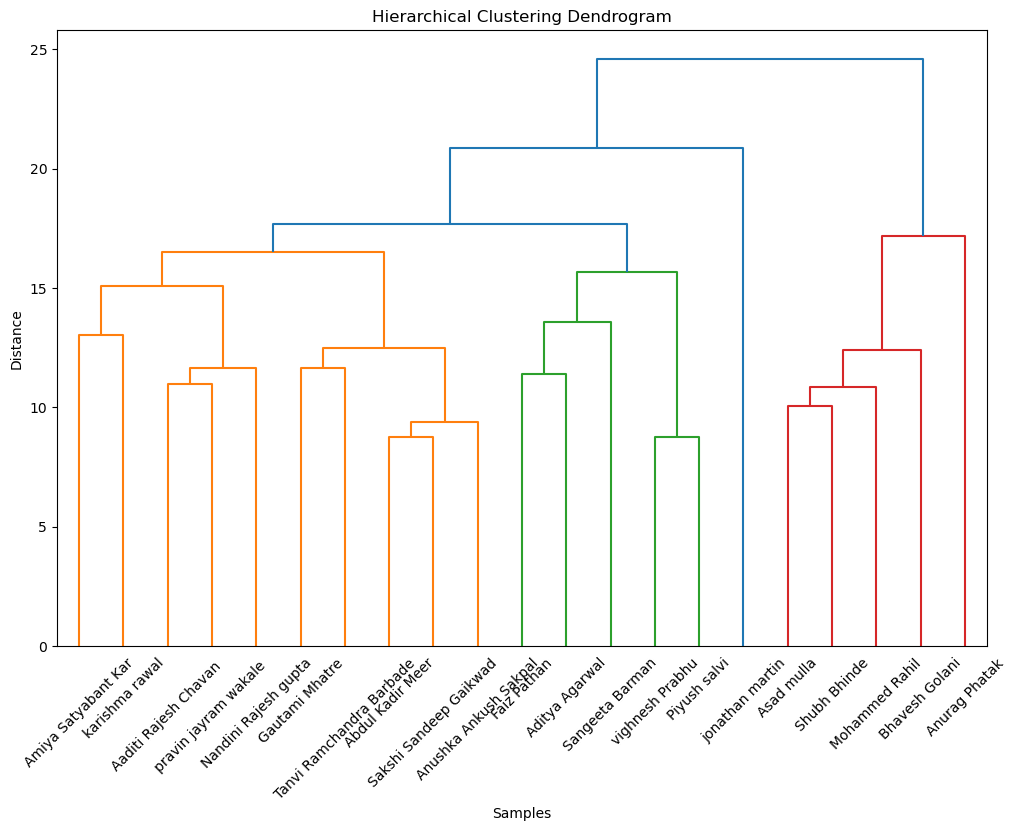

In [49]:
# Step 2: Create a dendrogram to visualize the clustering
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', labels=df['Name'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [50]:
# Step 3: Cut the dendrogram to create 5 clusters
n_clusters = 5
clusters = fcluster(linked, n_clusters, criterion='maxclust')

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Display the DataFrame with cluster assignments
print(df[['Name', 'Cluster']])  # Show the Name and Cluster columns




                        Name  Cluster
0               Shubh Bhinde        1
1              Anurag Phatak        2
2   Tanvi Ramchandra Barbade        4
3            Sangeeta Barman        3
4             Gautami Mhatre        4
5       Nandini Rajesh gupta        4
6             Aditya Agarwal        3
7      pravin jayram wakale         4
8     Sakshi Sandeep Gaikwad        4
9            jonathan martin        5
10              Piyush salvi        3
11            Bhavesh Golani        1
12            karishma rawal        4
13            Mohammed Rahil        1
14       Amiya Satyabant Kar        4
15     Aaditi Rajesh Chavan         4
16     Anushka Ankush Sakpal        4
17               Faiz Pathan        3
18           vighnesh Prabhu        3
19          Abdul Kadir Meer        4
20                Asad mulla        1


In [51]:
# Step 4: Identify similar clusters (based on cluster assignments)
similar_clusters = df.groupby('Cluster')['Name'].apply(list)
print("\nSimilar Clusters:")
for cluster, names in similar_clusters.items():
    print(f"Cluster {cluster}: {names}")


Similar Clusters:
Cluster 1: ['Shubh Bhinde', 'Bhavesh Golani', 'Mohammed Rahil', 'Asad mulla']
Cluster 2: ['Anurag Phatak']
Cluster 3: ['Sangeeta Barman', 'Aditya Agarwal', 'Piyush salvi', 'Faiz Pathan', 'vighnesh Prabhu']
Cluster 4: ['Tanvi Ramchandra Barbade', 'Gautami Mhatre', 'Nandini Rajesh gupta', 'pravin jayram wakale ', 'Sakshi Sandeep Gaikwad', 'karishma rawal', 'Amiya Satyabant Kar', 'Aaditi Rajesh Chavan ', 'Anushka Ankush Sakpal', 'Abdul Kadir Meer']
Cluster 5: ['jonathan martin']


### With Threshold

- **Threshold**: Determines where to cut the dendrogram to form clusters.


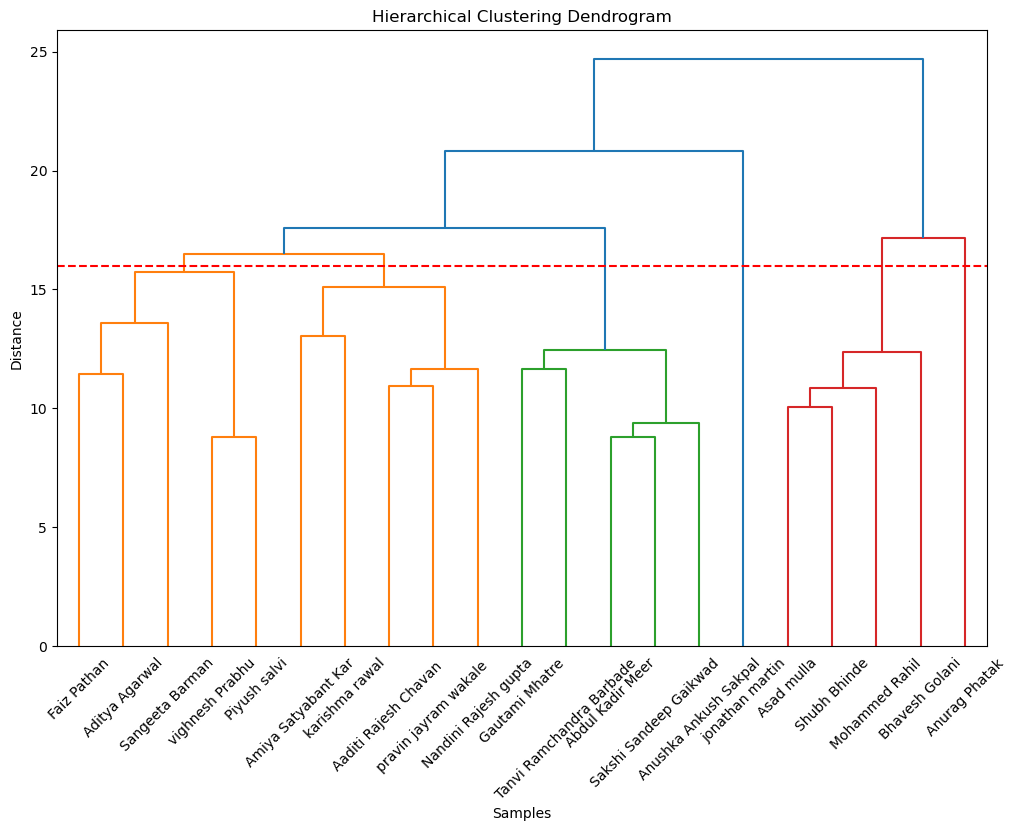

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

X = df.drop(columns=['Timestamp', 'Score', 'Name']).values  # Adjust based on your actual columns

# Step 1: Perform hierarchical clustering
# Using 'ward' method to minimize the variance of clusters
linked = linkage(X, method='ward')

# Step 2: Create a dendrogram to visualize the clustering
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', labels=df['Name'].values, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.axhline(y=16, color='r', linestyle='--')  # Draw a horizontal line at y=16
plt.show()



In [58]:
# Step 4: Group by clusters and calculate the mean of features
clustered_data = df.groupby('Cluster').mean(numeric_only=True)  # Using numeric_only=True to avoid non-numeric columns

# Display the mean values of features by clusters
print("Mean Values by Cluster:")
clustered_data

Mean Values by Cluster:


,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest.,Seeing other people cry can easily make you feel like you want to cry too.,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure.","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know.",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,"When someone thinks highly of you, you wonder how long it will take them to feel disappointed in you.",You would love a job that requires you to work alone most of the time.,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.
Cluster,,,,,,,,,,,,,,,,,,,,,
1,4.25,5.0,2.5,3.5,4.75,2.25,3.5,2.75,3.0,1.25,...,1.5,1.75,1.75,3.75,3.75,1.75,3.25,2.25,4.0,1.25
2,3.00,5.0,1.0,3.0,5.00,5.00,5.0,1.00,5.0,1.00,...,2.0,2.00,1.00,1.00,2.00,2.00,5.00,3.00,5.0,1.00
3,3.20,3.8,2.4,3.6,2.60,3.40,3.6,2.00,3.4,3.80,...,3.0,2.80,3.40,3.40,3.00,2.20,2.80,4.20,2.0,3.60
4,4.10,4.3,3.5,4.2,3.60,3.50,4.6,3.30,4.3,3.30,...,2.1,3.20,3.30,2.80,3.50,3.80,4.10,3.00,3.2,2.50
5,3.00,2.0,5.0,1.0,1.00,4.00,5.0,3.00,1.0,5.00,...,5.0,5.00,4.00,1.00,5.00,5.00,1.00,3.00,5.0,5.00


In [61]:
# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Step 4: Identify similar clusters (based on cluster assignments)
similar_clusters = df.groupby('Cluster')['Name'].apply(list)
print("\nSimilar Clusters:")
for cluster, names in similar_clusters.items():
    print(f"Cluster {cluster}: {names}")



Similar Clusters:
Cluster 1: ['Shubh Bhinde', 'Bhavesh Golani', 'Mohammed Rahil', 'Asad mulla']
Cluster 2: ['Anurag Phatak']
Cluster 3: ['Sangeeta Barman', 'Aditya Agarwal', 'Piyush salvi', 'Faiz Pathan', 'vighnesh Prabhu']
Cluster 4: ['Tanvi Ramchandra Barbade', 'Gautami Mhatre', 'Nandini Rajesh gupta', 'pravin jayram wakale ', 'Sakshi Sandeep Gaikwad', 'karishma rawal', 'Amiya Satyabant Kar', 'Aaditi Rajesh Chavan ', 'Anushka Ankush Sakpal', 'Abdul Kadir Meer']
Cluster 5: ['jonathan martin']
